In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\IMMACULATE.MUSYOKA\AppData\Roaming\Python\Python37\site-packages\setuptools\_importlib.py:23: UserWarning: `importlib-metadata` version is incompatible with `setuptools`.
This problem is likely to be solved by installing an updated version of `importlib-metadata`.
  warnings.warn(msg)  # Ensure a descriptive message is shown.


In [2]:
df=pd.read_csv("data.csv")
df.head()

,Date,Amount
0,2-Jan-20,0.002
1,3-Jan-20,0.003
2,4-Jan-20,35000.003
3,5-Jan-20,35000.004
4,6-Jan-20,35000.005


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
Date      139 non-null object
Amount    139 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [4]:
df.describe()

,Amount
count,1.390000e+02
mean,2.660209e+05
std,3.025119e+05
min,1.000000e-03
25%,3.500001e+04
50%,1.350000e+05
75%,4.148000e+05
max,2.080400e+06


In [5]:
type(df['Date'])

pandas.core.series.Series

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2020-01-02
1   2020-01-03
2   2020-01-04
3   2020-01-05
4   2020-01-06
Name: Date, dtype: datetime64[ns]

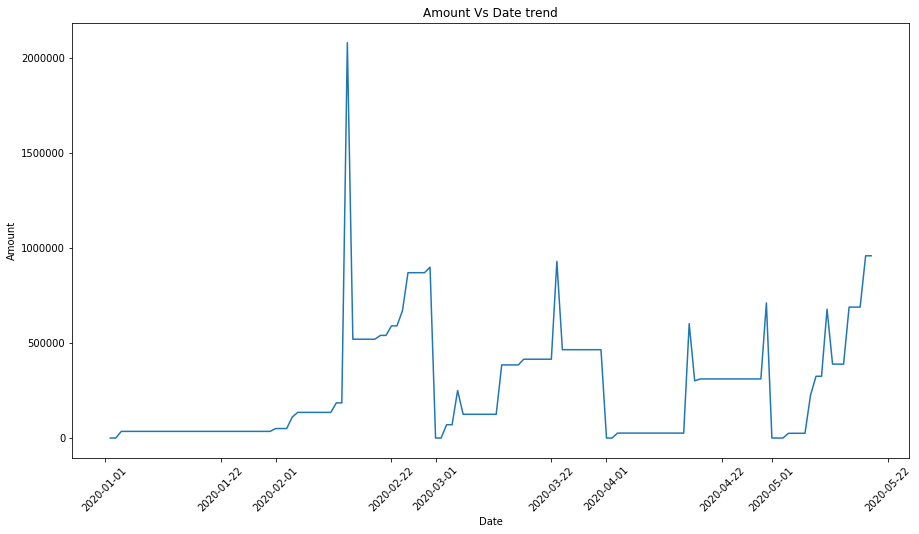

In [8]:
#plot the rlnship btw amount and date
plt.figure(figsize=(15,8))
sns.lineplot(x=df["Date"],y=df["Amount"])
plt.title("Amount Vs Date trend")
plt.xticks(rotation=45);

In [7]:
#testing stationality
from statsmodels.tsa.stattools import adfuller

In [8]:
test_result=adfuller(df['Amount'])

In [9]:
#HYPOTHESIS TEST:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(amount):
    
    result=adfuller(amount)
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
adfuller_test(df['Amount'])

ADF Test Statistic : -3.424711121071538
p-value : 0.010144768470909223
#Lags Used : 1
Number of Observations Used : 137
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## SARIMA

In [11]:
#df['Seasonal First Difference']=df['Amount']-df['Amount'].shift(12)
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\IMMACULATE.MUSYOKA\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Train/Test split for Customer_Spending Data')

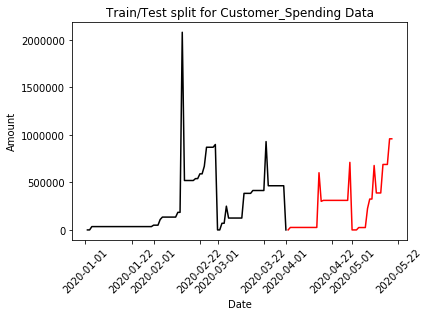

In [12]:
train = df.query('Date <= "2020-04-01"')
test = df.query('Date >"2020-04-01"')
#train = df[df.index <= pd.to_datetime("2020-04-01", format='%Y-%m-%d')]
#test = df[df.index > pd.to_datetime("2020-04-01", format='%Y-%m-%d')]

sns.lineplot(x=train["Date"],y=train["Amount"], color = "black")
sns.lineplot(x=test["Date"],y=test["Amount"], color = "red")
plt.ylabel('Amount')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Customer_Spending Data")
#plt.show()

In [2]:
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(df,model='additive')
fig = result.plot()

C:\Users\IMMACULATE.MUSYOKA\AppData\Roaming\Python\Python37\site-packages\setuptools\_importlib.py:23: UserWarning: `importlib-metadata` version is incompatible with `setuptools`.
This problem is likely to be solved by installing an updated version of `importlib-metadata`.
  warnings.warn(msg)  # Ensure a descriptive message is shown.


NameError: name 'seasonal_decompose' is not defined

In [13]:
x=len(train)
x

91

In [14]:
y=train['Amount']

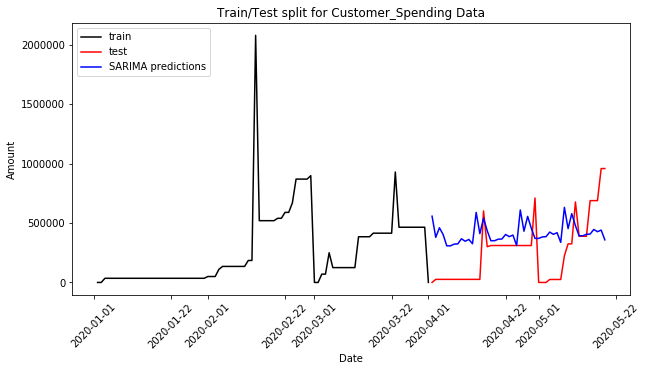

In [16]:
#SARIMAX(2, 1, 2)x(2, 1, 2, 12)- trend,seasonality,noise
SARIMAXmodel = SARIMAX(y, order = (1, 1, 1), seasonal_order=(1,1,1,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.figure(figsize=(10,5))
sns.lineplot(x=train["Date"],y=train["Amount"], color = "black")
sns.lineplot(x=test["Date"],y=test["Amount"], color = "red")
sns.lineplot(y=y_pred_df["Predictions"],x=test["Date"],color='Blue', label = 'SARIMA Predictions')
plt.ylabel('Amount')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Customer_Spending Data")
plt.legend(['train','test','SARIMA predictions'],
            loc='upper left')

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Amount"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",arma_rmse)

SARIMA RMSE:  304777.9501545089


## Holt-Winters

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:69: RuntimeWarning: overflow encountered in double_scalars
  l[i] = (y_alpha[i - 1]) + (alphac * (l[i - 1] * b[i - 1]**phi))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:70: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:71: RuntimeWarning: overflow encountered in multiply
  return sqeuclidean(l * b**phi, y)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:708: RuntimeWarning: overflow encountered in multiply
  (alphac * trended(l[i - 1], dampen(b[i - 1], phi)))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:710: RuntimeWarning: invalid value encountered in true_divide
  b[i] = (beta * detrend(l[i], l[i - 1])) + \
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:

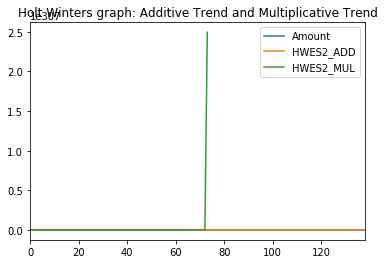

In [19]:
df['HWES2_ADD'] = ExponentialSmoothing(df['Amount'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['Amount'],trend='mul').fit().fittedvalues

df[['Amount','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters graph: Additive Trend and Multiplicative Trend');

### Double Exponential Smoothing

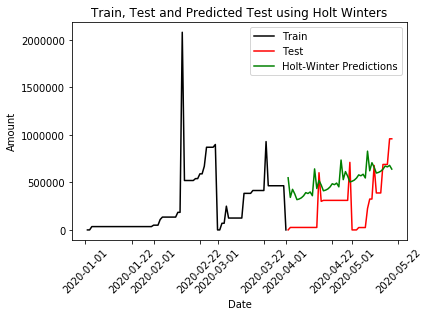

In [20]:
fitted_model = ExponentialSmoothing(train['Amount'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(len(test))
#df['Amount'].plot(legend=True,label='TRAIN')
sns.lineplot(x=train["Date"],y=train["Amount"], color = "black",label = 'Train')
sns.lineplot(x=test["Date"],y=test["Amount"], color = "red",label = 'Test')
sns.lineplot(y=test_predictions,x=test["Date"],color='green', label = 'Holt-Winter Predictions')
plt.ylabel('Amount')
plt.xlabel('Date')
plt.xticks(rotation=45)
#test['Amount'].plot(legend=True,label='TEST')
#test_predictions['Predictions'].plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error

holt_rmse = np.sqrt(mean_squared_error(test["Amount"].values, test_predictions))
print("holt RMSE: ",holt_rmse)

holt RMSE:  345009.33422877203


## Prophet

In [22]:
from prophet import Prophet

In [23]:
#read the data
df=pd.read_csv("data.csv")
df.head()

,Date,Amount
0,2-Jan-20,0.002
1,3-Jan-20,0.003
2,4-Jan-20,35000.003
3,5-Jan-20,35000.004
4,6-Jan-20,35000.005


In [24]:
# convert the date column datatype
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
train1 = df.query('Date <= "2020-04-01"')
test1 = df.query('Date >"2020-04-01"')

In [26]:
# prepare expected column names
train1.columns = ['ds', 'y']
test1.columns = ['ds', 'y']


In [27]:

# define the model
#default interval=0.8
model = Prophet(interval_width=0.99)

# fit the model
model.fit(train1);

15:19:23 - cmdstanpy - INFO - Chain [1] start processing
15:19:23 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
forecast = model.predict(test1)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-04-02,524620.438004,-214753.490637,1.185769e+06
1,2020-04-03,680779.116656,25666.199324,1.499464e+06
2,2020-04-04,570668.098586,-120387.438479,1.270879e+06
3,2020-04-05,501497.100234,-132516.878177,1.178931e+06
4,2020-04-06,547258.168449,-191260.067666,1.221412e+06


MAE: 428460.847


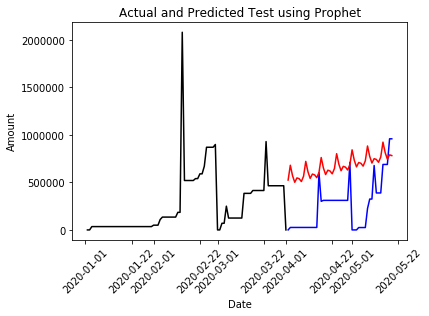

In [29]:
import numpy as np
from sklearn.metrics import mean_absolute_error
y_true = test1['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
#plt.plot(y_true, label='Actual')
#plt.plot(y_pred, label='Predicted')
sns.lineplot(x=test1["ds"],y=y_true, color = "blue")
sns.lineplot(x=test1["ds"],y=y_pred, color = "red")
sns.lineplot(x=train1["ds"],y=train1["y"], color = "black")
plt.ylabel('Amount')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title( 'Actual and Predicted Test using Prophet')
#plt.legend()
plt.show()

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error

prophet_rmse = np.sqrt(mean_squared_error(test1["y"].values, forecast['yhat']))
print("prophet RMSE: ",prophet_rmse)

prophet RMSE:  472428.67258644983
